In [1]:
#!pip install tensorflow

In [7]:
import tensorflow as tf
import numpy as np

corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

# convert to lower case
corpus_raw = corpus_raw.lower()

words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words) # so that all duplicate words are removed
word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())

WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word

for data_word in data:
    x_train.append(to_one_hot(word2int[ data_word[0] ], vocab_size))
    y_train.append(to_one_hot(word2int[ data_word[1] ], vocab_size))

# convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

# making placeholders for x_train and y_train
x = tf.placeholder(tf.float32, shape=(None, vocab_size))
y_label = tf.placeholder(tf.float32, shape=(None, vocab_size))

EMBEDDING_DIM = 5 # you can choose your own number
W1 = tf.Variable(tf.random_normal([vocab_size, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([EMBEDDING_DIM])) #bias
hidden_representation = tf.add(tf.matmul(x,W1), b1)

W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, vocab_size]))
b2 = tf.Variable(tf.random_normal([vocab_size]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_representation, W2), b2))


sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) #make sure you do this!

# define the loss function:
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), reduction_indices=[1]))

# define the training step:
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 10000
# train for n_iter iterations

for _ in range(n_iters):
    sess.run(train_step, feed_dict={x: x_train, y_label: y_train})
    print('loss is : ', sess.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

vectors = sess.run(W1 + b1)

('loss is : ', 4.770094)
('loss is : ', 4.5315514)
('loss is : ', 4.3378067)
('loss is : ', 4.1745963)
('loss is : ', 4.0333204)
('loss is : ', 3.9085271)
('loss is : ', 3.7965026)
('loss is : ', 3.6946187)
('loss is : ', 3.6009898)
('loss is : ', 3.5142572)
('loss is : ', 3.4334252)
('loss is : ', 3.357755)
('loss is : ', 3.286679)
('loss is : ', 3.2197533)
('loss is : ', 3.1566157)
('loss is : ', 3.0969653)
('loss is : ', 3.040543)
('loss is : ', 2.9871223)
('loss is : ', 2.936501)
('loss is : ', 2.8884962)
('loss is : ', 2.842941)
('loss is : ', 2.7996812)
('loss is : ', 2.7585745)
('loss is : ', 2.7194874)
('loss is : ', 2.682296)
('loss is : ', 2.646883)
('loss is : ', 2.6131382)
('loss is : ', 2.5809581)
('loss is : ', 2.5502431)
('loss is : ', 2.520901)
('loss is : ', 2.4928432)
('loss is : ', 2.4659865)
('loss is : ', 2.4402523)
('loss is : ', 2.4155667)
('loss is : ', 2.39186)
('loss is : ', 2.3690684)
('loss is : ', 2.3471308)
('loss is : ', 2.3259919)
('loss is : ', 2.305599

('loss is : ', 1.366597)
('loss is : ', 1.3664082)
('loss is : ', 1.3662205)
('loss is : ', 1.366034)
('loss is : ', 1.3658485)
('loss is : ', 1.3656641)
('loss is : ', 1.3654808)
('loss is : ', 1.3652984)
('loss is : ', 1.3651172)
('loss is : ', 1.3649371)
('loss is : ', 1.3647581)
('loss is : ', 1.3645799)
('loss is : ', 1.3644029)
('loss is : ', 1.3642269)
('loss is : ', 1.3640517)
('loss is : ', 1.3638779)
('loss is : ', 1.3637049)
('loss is : ', 1.3635328)
('loss is : ', 1.3633618)
('loss is : ', 1.3631918)
('loss is : ', 1.3630228)
('loss is : ', 1.3628548)
('loss is : ', 1.3626877)
('loss is : ', 1.3625214)
('loss is : ', 1.3623563)
('loss is : ', 1.3621922)
('loss is : ', 1.3620288)
('loss is : ', 1.3618665)
('loss is : ', 1.3617051)
('loss is : ', 1.3615446)
('loss is : ', 1.3613849)
('loss is : ', 1.3612263)
('loss is : ', 1.3610685)
('loss is : ', 1.3609116)
('loss is : ', 1.3607558)
('loss is : ', 1.3606006)
('loss is : ', 1.3604463)
('loss is : ', 1.3602933)
('loss is : ',

('loss is : ', 1.3370068)
('loss is : ', 1.3369694)
('loss is : ', 1.3369324)
('loss is : ', 1.3368953)
('loss is : ', 1.3368586)
('loss is : ', 1.3368218)
('loss is : ', 1.3367853)
('loss is : ', 1.336749)
('loss is : ', 1.3367126)
('loss is : ', 1.3366764)
('loss is : ', 1.3366405)
('loss is : ', 1.3366045)
('loss is : ', 1.3365687)
('loss is : ', 1.3365332)
('loss is : ', 1.3364978)
('loss is : ', 1.3364624)
('loss is : ', 1.3364271)
('loss is : ', 1.3363922)
('loss is : ', 1.3363571)
('loss is : ', 1.3363222)
('loss is : ', 1.3362876)
('loss is : ', 1.336253)
('loss is : ', 1.3362187)
('loss is : ', 1.3361843)
('loss is : ', 1.3361502)
('loss is : ', 1.3361161)
('loss is : ', 1.336082)
('loss is : ', 1.3360481)
('loss is : ', 1.3360146)
('loss is : ', 1.335981)
('loss is : ', 1.3359475)
('loss is : ', 1.3359141)
('loss is : ', 1.335881)
('loss is : ', 1.3358479)
('loss is : ', 1.3358151)
('loss is : ', 1.335782)
('loss is : ', 1.3357495)
('loss is : ', 1.3357168)
('loss is : ', 1.3

('loss is : ', 1.3284564)
('loss is : ', 1.3284458)
('loss is : ', 1.328435)
('loss is : ', 1.3284246)
('loss is : ', 1.328414)
('loss is : ', 1.3284032)
('loss is : ', 1.3283929)
('loss is : ', 1.3283823)
('loss is : ', 1.3283718)
('loss is : ', 1.3283613)
('loss is : ', 1.328351)
('loss is : ', 1.3283404)
('loss is : ', 1.32833)
('loss is : ', 1.3283197)
('loss is : ', 1.3283093)
('loss is : ', 1.3282989)
('loss is : ', 1.3282887)
('loss is : ', 1.3282784)
('loss is : ', 1.3282682)
('loss is : ', 1.3282579)
('loss is : ', 1.3282477)
('loss is : ', 1.3282377)
('loss is : ', 1.3282273)
('loss is : ', 1.3282173)
('loss is : ', 1.3282071)
('loss is : ', 1.3281969)
('loss is : ', 1.328187)
('loss is : ', 1.328177)
('loss is : ', 1.3281668)
('loss is : ', 1.328157)
('loss is : ', 1.3281469)
('loss is : ', 1.3281369)
('loss is : ', 1.3281269)
('loss is : ', 1.328117)
('loss is : ', 1.3281074)
('loss is : ', 1.3280973)
('loss is : ', 1.3280876)
('loss is : ', 1.3280777)
('loss is : ', 1.3280

('loss is : ', 1.3258903)
('loss is : ', 1.3258848)
('loss is : ', 1.3258793)
('loss is : ', 1.3258742)
('loss is : ', 1.3258687)
('loss is : ', 1.3258634)
('loss is : ', 1.3258581)
('loss is : ', 1.3258526)
('loss is : ', 1.3258474)
('loss is : ', 1.325842)
('loss is : ', 1.3258367)
('loss is : ', 1.3258314)
('loss is : ', 1.3258262)
('loss is : ', 1.3258208)
('loss is : ', 1.3258156)
('loss is : ', 1.3258103)
('loss is : ', 1.3258051)
('loss is : ', 1.3258)
('loss is : ', 1.3257948)
('loss is : ', 1.3257893)
('loss is : ', 1.3257841)
('loss is : ', 1.325779)
('loss is : ', 1.3257738)
('loss is : ', 1.3257686)
('loss is : ', 1.3257635)
('loss is : ', 1.3257583)
('loss is : ', 1.3257532)
('loss is : ', 1.325748)
('loss is : ', 1.3257428)
('loss is : ', 1.3257377)
('loss is : ', 1.3257326)
('loss is : ', 1.3257273)
('loss is : ', 1.3257225)
('loss is : ', 1.3257172)
('loss is : ', 1.3257122)
('loss is : ', 1.3257072)
('loss is : ', 1.325702)
('loss is : ', 1.325697)
('loss is : ', 1.325

('loss is : ', 1.3244274)
('loss is : ', 1.3244243)
('loss is : ', 1.3244213)
('loss is : ', 1.3244181)
('loss is : ', 1.324415)
('loss is : ', 1.324412)
('loss is : ', 1.3244088)
('loss is : ', 1.3244058)
('loss is : ', 1.3244028)
('loss is : ', 1.3243997)
('loss is : ', 1.3243968)
('loss is : ', 1.3243937)
('loss is : ', 1.3243905)
('loss is : ', 1.3243876)
('loss is : ', 1.3243847)
('loss is : ', 1.3243817)
('loss is : ', 1.3243786)
('loss is : ', 1.3243756)
('loss is : ', 1.3243725)
('loss is : ', 1.3243695)
('loss is : ', 1.3243666)
('loss is : ', 1.3243636)
('loss is : ', 1.3243606)
('loss is : ', 1.3243576)
('loss is : ', 1.3243545)
('loss is : ', 1.3243514)
('loss is : ', 1.3243486)
('loss is : ', 1.3243456)
('loss is : ', 1.3243426)
('loss is : ', 1.3243396)
('loss is : ', 1.3243368)
('loss is : ', 1.3243338)
('loss is : ', 1.3243307)
('loss is : ', 1.3243278)
('loss is : ', 1.3243248)
('loss is : ', 1.324322)
('loss is : ', 1.324319)
('loss is : ', 1.3243161)
('loss is : ', 1

('loss is : ', 1.3234383)
('loss is : ', 1.3234363)
('loss is : ', 1.3234345)
('loss is : ', 1.3234327)
('loss is : ', 1.3234308)
('loss is : ', 1.323429)
('loss is : ', 1.3234272)
('loss is : ', 1.3234253)
('loss is : ', 1.3234235)
('loss is : ', 1.3234216)
('loss is : ', 1.3234198)
('loss is : ', 1.3234181)
('loss is : ', 1.3234162)
('loss is : ', 1.3234143)
('loss is : ', 1.3234127)
('loss is : ', 1.3234107)
('loss is : ', 1.3234091)
('loss is : ', 1.323407)
('loss is : ', 1.3234053)
('loss is : ', 1.3234035)
('loss is : ', 1.3234017)
('loss is : ', 1.3233998)
('loss is : ', 1.323398)
('loss is : ', 1.3233963)
('loss is : ', 1.3233945)
('loss is : ', 1.3233926)
('loss is : ', 1.323391)
('loss is : ', 1.3233892)
('loss is : ', 1.3233874)
('loss is : ', 1.3233857)
('loss is : ', 1.3233838)
('loss is : ', 1.323382)
('loss is : ', 1.3233802)
('loss is : ', 1.3233784)
('loss is : ', 1.3233767)
('loss is : ', 1.3233747)
('loss is : ', 1.323373)
('loss is : ', 1.3233713)
('loss is : ', 1.3

('loss is : ', 1.3228521)
('loss is : ', 1.3228511)
('loss is : ', 1.3228499)
('loss is : ', 1.3228486)
('loss is : ', 1.3228472)
('loss is : ', 1.3228462)
('loss is : ', 1.3228447)
('loss is : ', 1.3228437)
('loss is : ', 1.3228424)
('loss is : ', 1.3228412)
('loss is : ', 1.32284)
('loss is : ', 1.3228388)
('loss is : ', 1.3228374)
('loss is : ', 1.3228363)
('loss is : ', 1.322835)
('loss is : ', 1.3228338)
('loss is : ', 1.3228326)
('loss is : ', 1.3228313)
('loss is : ', 1.3228301)
('loss is : ', 1.3228289)
('loss is : ', 1.3228275)
('loss is : ', 1.3228264)
('loss is : ', 1.3228252)
('loss is : ', 1.3228239)
('loss is : ', 1.3228228)
('loss is : ', 1.3228215)
('loss is : ', 1.3228202)
('loss is : ', 1.322819)
('loss is : ', 1.3228178)
('loss is : ', 1.3228166)
('loss is : ', 1.3228154)
('loss is : ', 1.3228141)
('loss is : ', 1.3228129)
('loss is : ', 1.3228116)
('loss is : ', 1.3228104)
('loss is : ', 1.3228093)
('loss is : ', 1.3228083)
('loss is : ', 1.3228068)
('loss is : ', 1

('loss is : ', 1.322385)
('loss is : ', 1.3223841)
('loss is : ', 1.3223834)
('loss is : ', 1.3223826)
('loss is : ', 1.3223816)
('loss is : ', 1.3223808)
('loss is : ', 1.3223801)
('loss is : ', 1.3223791)
('loss is : ', 1.3223784)
('loss is : ', 1.3223774)
('loss is : ', 1.3223766)
('loss is : ', 1.3223759)
('loss is : ', 1.3223749)
('loss is : ', 1.3223741)
('loss is : ', 1.3223733)
('loss is : ', 1.3223726)
('loss is : ', 1.3223715)
('loss is : ', 1.3223709)
('loss is : ', 1.3223698)
('loss is : ', 1.3223691)
('loss is : ', 1.3223683)
('loss is : ', 1.3223674)
('loss is : ', 1.3223666)
('loss is : ', 1.3223658)
('loss is : ', 1.3223649)
('loss is : ', 1.3223641)
('loss is : ', 1.3223634)
('loss is : ', 1.3223625)
('loss is : ', 1.3223617)
('loss is : ', 1.3223609)
('loss is : ', 1.32236)
('loss is : ', 1.3223592)
('loss is : ', 1.3223584)
('loss is : ', 1.3223577)
('loss is : ', 1.3223567)
('loss is : ', 1.3223559)
('loss is : ', 1.3223552)
('loss is : ', 1.3223542)
('loss is : ', 

('loss is : ', 1.3220882)
('loss is : ', 1.3220875)
('loss is : ', 1.3220869)
('loss is : ', 1.3220863)
('loss is : ', 1.3220856)
('loss is : ', 1.3220851)
('loss is : ', 1.3220844)
('loss is : ', 1.3220838)
('loss is : ', 1.3220832)
('loss is : ', 1.3220825)
('loss is : ', 1.3220818)
('loss is : ', 1.3220814)
('loss is : ', 1.3220807)
('loss is : ', 1.3220801)
('loss is : ', 1.3220795)
('loss is : ', 1.3220788)
('loss is : ', 1.3220782)
('loss is : ', 1.3220776)
('loss is : ', 1.3220772)
('loss is : ', 1.3220764)
('loss is : ', 1.3220758)
('loss is : ', 1.3220752)
('loss is : ', 1.3220745)
('loss is : ', 1.3220739)
('loss is : ', 1.3220733)
('loss is : ', 1.3220727)
('loss is : ', 1.3220721)
('loss is : ', 1.3220716)
('loss is : ', 1.322071)
('loss is : ', 1.3220702)
('loss is : ', 1.3220696)
('loss is : ', 1.322069)
('loss is : ', 1.3220685)
('loss is : ', 1.3220679)
('loss is : ', 1.3220673)
('loss is : ', 1.3220664)
('loss is : ', 1.322066)
('loss is : ', 1.3220654)
('loss is : ', 

('loss is : ', 1.3218802)
('loss is : ', 1.3218799)
('loss is : ', 1.3218794)
('loss is : ', 1.3218789)
('loss is : ', 1.3218783)
('loss is : ', 1.3218778)
('loss is : ', 1.3218775)
('loss is : ', 1.321877)
('loss is : ', 1.3218764)
('loss is : ', 1.3218759)
('loss is : ', 1.3218756)
('loss is : ', 1.321875)
('loss is : ', 1.3218745)
('loss is : ', 1.3218739)
('loss is : ', 1.3218734)
('loss is : ', 1.321873)
('loss is : ', 1.3218726)
('loss is : ', 1.321872)
('loss is : ', 1.3218715)
('loss is : ', 1.3218709)
('loss is : ', 1.3218707)
('loss is : ', 1.3218701)
('loss is : ', 1.3218696)
('loss is : ', 1.3218691)
('loss is : ', 1.3218685)
('loss is : ', 1.3218681)
('loss is : ', 1.3218677)
('loss is : ', 1.3218671)
('loss is : ', 1.3218668)
('loss is : ', 1.321866)
('loss is : ', 1.3218658)
('loss is : ', 1.3218652)
('loss is : ', 1.3218647)
('loss is : ', 1.3218641)
('loss is : ', 1.3218639)
('loss is : ', 1.3218633)
('loss is : ', 1.3218629)
('loss is : ', 1.3218623)
('loss is : ', 1.

('loss is : ', 1.3217171)
('loss is : ', 1.3217165)
('loss is : ', 1.3217163)
('loss is : ', 1.3217158)
('loss is : ', 1.3217154)
('loss is : ', 1.3217151)
('loss is : ', 1.3217146)
('loss is : ', 1.3217143)
('loss is : ', 1.3217138)
('loss is : ', 1.3217134)
('loss is : ', 1.3217131)
('loss is : ', 1.3217127)
('loss is : ', 1.3217124)
('loss is : ', 1.3217119)
('loss is : ', 1.3217115)
('loss is : ', 1.3217112)
('loss is : ', 1.3217106)
('loss is : ', 1.3217102)
('loss is : ', 1.3217098)
('loss is : ', 1.3217095)
('loss is : ', 1.3217092)
('loss is : ', 1.3217088)
('loss is : ', 1.3217083)
('loss is : ', 1.321708)
('loss is : ', 1.3217075)
('loss is : ', 1.3217072)
('loss is : ', 1.3217068)
('loss is : ', 1.3217063)
('loss is : ', 1.3217059)
('loss is : ', 1.3217056)
('loss is : ', 1.3217052)
('loss is : ', 1.3217047)
('loss is : ', 1.3217044)
('loss is : ', 1.321704)
('loss is : ', 1.3217038)
('loss is : ', 1.3217033)
('loss is : ', 1.321703)
('loss is : ', 1.3217025)
('loss is : ', 

('loss is : ', 1.3215736)
('loss is : ', 1.3215735)
('loss is : ', 1.321573)
('loss is : ', 1.3215727)
('loss is : ', 1.3215723)
('loss is : ', 1.3215721)
('loss is : ', 1.3215717)
('loss is : ', 1.3215715)
('loss is : ', 1.3215711)
('loss is : ', 1.3215708)
('loss is : ', 1.3215704)
('loss is : ', 1.3215703)
('loss is : ', 1.3215697)
('loss is : ', 1.3215696)
('loss is : ', 1.3215691)
('loss is : ', 1.3215688)
('loss is : ', 1.3215685)
('loss is : ', 1.3215684)
('loss is : ', 1.3215678)
('loss is : ', 1.3215677)
('loss is : ', 1.3215673)
('loss is : ', 1.3215669)
('loss is : ', 1.3215666)
('loss is : ', 1.3215665)
('loss is : ', 1.321566)
('loss is : ', 1.3215659)
('loss is : ', 1.3215653)
('loss is : ', 1.321565)
('loss is : ', 1.3215648)
('loss is : ', 1.3215646)
('loss is : ', 1.3215643)
('loss is : ', 1.3215637)
('loss is : ', 1.3215636)
('loss is : ', 1.3215632)
('loss is : ', 1.3215629)
('loss is : ', 1.3215626)
('loss is : ', 1.3215624)
('loss is : ', 1.3215619)
('loss is : ', 

('loss is : ', 1.3214673)
('loss is : ', 1.321467)
('loss is : ', 1.3214666)
('loss is : ', 1.3214664)
('loss is : ', 1.3214661)
('loss is : ', 1.3214658)
('loss is : ', 1.3214656)
('loss is : ', 1.3214654)
('loss is : ', 1.3214651)
('loss is : ', 1.3214648)
('loss is : ', 1.3214645)
('loss is : ', 1.3214643)
('loss is : ', 1.3214641)
('loss is : ', 1.3214637)
('loss is : ', 1.3214635)
('loss is : ', 1.3214632)
('loss is : ', 1.3214629)
('loss is : ', 1.3214626)
('loss is : ', 1.3214625)
('loss is : ', 1.3214622)
('loss is : ', 1.3214618)
('loss is : ', 1.3214617)
('loss is : ', 1.3214614)
('loss is : ', 1.3214613)
('loss is : ', 1.3214608)
('loss is : ', 1.3214606)
('loss is : ', 1.3214604)
('loss is : ', 1.32146)
('loss is : ', 1.3214598)
('loss is : ', 1.3214595)
('loss is : ', 1.3214593)
('loss is : ', 1.3214589)
('loss is : ', 1.3214588)
('loss is : ', 1.3214586)
('loss is : ', 1.3214582)
('loss is : ', 1.321458)
('loss is : ', 1.3214577)
('loss is : ', 1.3214575)
('loss is : ', 1

('loss is : ', 1.3213637)
('loss is : ', 1.3213636)
('loss is : ', 1.3213632)
('loss is : ', 1.321363)
('loss is : ', 1.3213626)
('loss is : ', 1.3213625)
('loss is : ', 1.3213624)
('loss is : ', 1.3213623)
('loss is : ', 1.3213619)
('loss is : ', 1.3213617)
('loss is : ', 1.3213613)
('loss is : ', 1.3213611)
('loss is : ', 1.3213611)
('loss is : ', 1.3213607)
('loss is : ', 1.3213606)
('loss is : ', 1.3213606)
('loss is : ', 1.32136)
('loss is : ', 1.32136)
('loss is : ', 1.3213598)
('loss is : ', 1.3213594)
('loss is : ', 1.3213593)
('loss is : ', 1.321359)
('loss is : ', 1.3213587)
('loss is : ', 1.3213587)
('loss is : ', 1.3213584)
('loss is : ', 1.3213582)
('loss is : ', 1.3213581)
('loss is : ', 1.3213578)
('loss is : ', 1.3213574)
('loss is : ', 1.3213573)
('loss is : ', 1.3213571)
('loss is : ', 1.3213568)
('loss is : ', 1.3213568)
('loss is : ', 1.3213565)
('loss is : ', 1.3213562)
('loss is : ', 1.321356)
('loss is : ', 1.3213558)
('loss is : ', 1.3213556)
('loss is : ', 1.32

('loss is : ', 1.3212836)
('loss is : ', 1.3212835)
('loss is : ', 1.3212832)
('loss is : ', 1.321283)
('loss is : ', 1.3212827)
('loss is : ', 1.3212826)
('loss is : ', 1.3212824)
('loss is : ', 1.3212823)
('loss is : ', 1.3212821)
('loss is : ', 1.321282)
('loss is : ', 1.3212817)
('loss is : ', 1.3212816)
('loss is : ', 1.3212813)
('loss is : ', 1.3212812)
('loss is : ', 1.3212808)
('loss is : ', 1.3212807)
('loss is : ', 1.3212806)
('loss is : ', 1.3212805)
('loss is : ', 1.3212804)
('loss is : ', 1.32128)
('loss is : ', 1.32128)
('loss is : ', 1.3212796)
('loss is : ', 1.3212794)
('loss is : ', 1.3212794)
('loss is : ', 1.3212792)
('loss is : ', 1.3212789)
('loss is : ', 1.3212788)
('loss is : ', 1.3212786)
('loss is : ', 1.3212786)
('loss is : ', 1.3212782)
('loss is : ', 1.3212781)
('loss is : ', 1.3212779)
('loss is : ', 1.3212777)
('loss is : ', 1.3212775)
('loss is : ', 1.3212773)
('loss is : ', 1.321277)
('loss is : ', 1.3212769)
('loss is : ', 1.3212767)
('loss is : ', 1.32

('loss is : ', 1.3212143)
('loss is : ', 1.3212142)
('loss is : ', 1.3212141)
('loss is : ', 1.3212137)
('loss is : ', 1.3212137)
('loss is : ', 1.3212136)
('loss is : ', 1.3212135)
('loss is : ', 1.3212132)
('loss is : ', 1.321213)
('loss is : ', 1.321213)
('loss is : ', 1.3212128)
('loss is : ', 1.3212125)
('loss is : ', 1.3212124)
('loss is : ', 1.3212124)
('loss is : ', 1.321212)
('loss is : ', 1.3212118)
('loss is : ', 1.3212118)
('loss is : ', 1.3212117)
('loss is : ', 1.3212115)
('loss is : ', 1.3212113)
('loss is : ', 1.3212111)
('loss is : ', 1.321211)
('loss is : ', 1.3212109)
('loss is : ', 1.3212105)
('loss is : ', 1.3212105)
('loss is : ', 1.3212103)
('loss is : ', 1.3212103)
('loss is : ', 1.32121)
('loss is : ', 1.3212099)
('loss is : ', 1.3212098)
('loss is : ', 1.3212095)
('loss is : ', 1.3212094)
('loss is : ', 1.3212092)
('loss is : ', 1.321209)
('loss is : ', 1.321209)
('loss is : ', 1.3212087)
('loss is : ', 1.3212086)
('loss is : ', 1.3212085)
('loss is : ', 1.321

('loss is : ', 1.3211477)
('loss is : ', 1.3211476)
('loss is : ', 1.3211474)
('loss is : ', 1.3211471)
('loss is : ', 1.3211471)
('loss is : ', 1.321147)
('loss is : ', 1.3211468)
('loss is : ', 1.3211466)
('loss is : ', 1.3211466)
('loss is : ', 1.3211464)
('loss is : ', 1.3211461)
('loss is : ', 1.3211462)
('loss is : ', 1.321146)
('loss is : ', 1.3211459)
('loss is : ', 1.3211457)
('loss is : ', 1.3211455)
('loss is : ', 1.3211454)
('loss is : ', 1.3211453)
('loss is : ', 1.321145)
('loss is : ', 1.321145)
('loss is : ', 1.3211449)
('loss is : ', 1.3211447)
('loss is : ', 1.3211447)
('loss is : ', 1.3211445)
('loss is : ', 1.3211445)
('loss is : ', 1.3211442)
('loss is : ', 1.321144)
('loss is : ', 1.3211439)
('loss is : ', 1.3211437)
('loss is : ', 1.3211436)
('loss is : ', 1.3211436)
('loss is : ', 1.3211433)
('loss is : ', 1.3211432)
('loss is : ', 1.3211432)
('loss is : ', 1.3211432)
('loss is : ', 1.3211429)
('loss is : ', 1.3211426)
('loss is : ', 1.3211426)
('loss is : ', 1.

('loss is : ', 1.3210919)
('loss is : ', 1.3210917)
('loss is : ', 1.3210917)
('loss is : ', 1.3210915)
('loss is : ', 1.3210914)
('loss is : ', 1.3210913)
('loss is : ', 1.3210912)
('loss is : ', 1.3210909)
('loss is : ', 1.321091)
('loss is : ', 1.3210908)
('loss is : ', 1.3210907)
('loss is : ', 1.3210906)
('loss is : ', 1.3210905)
('loss is : ', 1.3210902)
('loss is : ', 1.3210902)
('loss is : ', 1.3210902)
('loss is : ', 1.32109)
('loss is : ', 1.3210899)
('loss is : ', 1.3210897)
('loss is : ', 1.3210896)
('loss is : ', 1.3210895)
('loss is : ', 1.3210893)
('loss is : ', 1.3210893)
('loss is : ', 1.3210891)
('loss is : ', 1.3210889)
('loss is : ', 1.3210889)
('loss is : ', 1.3210889)
('loss is : ', 1.3210887)
('loss is : ', 1.3210886)
('loss is : ', 1.3210884)
('loss is : ', 1.3210883)
('loss is : ', 1.3210881)
('loss is : ', 1.3210881)
('loss is : ', 1.3210878)
('loss is : ', 1.3210878)
('loss is : ', 1.3210876)
('loss is : ', 1.3210876)
('loss is : ', 1.3210876)
('loss is : ', 

('loss is : ', 1.3210462)
('loss is : ', 1.3210461)
('loss is : ', 1.3210461)
('loss is : ', 1.321046)
('loss is : ', 1.3210459)
('loss is : ', 1.3210458)
('loss is : ', 1.3210456)
('loss is : ', 1.3210455)
('loss is : ', 1.3210455)
('loss is : ', 1.3210454)
('loss is : ', 1.3210453)
('loss is : ', 1.3210452)
('loss is : ', 1.321045)
('loss is : ', 1.3210449)
('loss is : ', 1.3210448)
('loss is : ', 1.3210447)
('loss is : ', 1.3210446)
('loss is : ', 1.3210444)
('loss is : ', 1.3210443)
('loss is : ', 1.3210442)
('loss is : ', 1.3210442)
('loss is : ', 1.321044)
('loss is : ', 1.321044)
('loss is : ', 1.321044)
('loss is : ', 1.3210437)
('loss is : ', 1.3210436)
('loss is : ', 1.3210436)
('loss is : ', 1.3210435)
('loss is : ', 1.3210434)
('loss is : ', 1.3210433)
('loss is : ', 1.3210431)
('loss is : ', 1.3210431)
('loss is : ', 1.3210429)
('loss is : ', 1.3210428)
('loss is : ', 1.3210428)
('loss is : ', 1.3210425)
('loss is : ', 1.3210427)
('loss is : ', 1.3210423)
('loss is : ', 1.

('loss is : ', 1.3210063)
('loss is : ', 1.3210063)
('loss is : ', 1.3210062)
('loss is : ', 1.3210061)
('loss is : ', 1.321006)
('loss is : ', 1.321006)
('loss is : ', 1.3210058)
('loss is : ', 1.3210058)
('loss is : ', 1.3210057)
('loss is : ', 1.3210056)
('loss is : ', 1.3210056)
('loss is : ', 1.3210053)
('loss is : ', 1.3210053)
('loss is : ', 1.3210052)
('loss is : ', 1.3210051)
('loss is : ', 1.321005)
('loss is : ', 1.321005)
('loss is : ', 1.3210047)
('loss is : ', 1.3210047)
('loss is : ', 1.3210046)
('loss is : ', 1.3210045)
('loss is : ', 1.3210045)
('loss is : ', 1.3210043)
('loss is : ', 1.3210044)
('loss is : ', 1.3210042)
('loss is : ', 1.3210039)
('loss is : ', 1.321004)
('loss is : ', 1.3210039)
('loss is : ', 1.3210039)
('loss is : ', 1.3210037)
('loss is : ', 1.3210037)
('loss is : ', 1.3210036)
('loss is : ', 1.3210034)
('loss is : ', 1.3210034)
('loss is : ', 1.3210033)
('loss is : ', 1.3210032)
('loss is : ', 1.3210032)
('loss is : ', 1.321003)
('loss is : ', 1.3

('loss is : ', 1.3209724)
('loss is : ', 1.3209726)
('loss is : ', 1.3209723)
('loss is : ', 1.3209723)
('loss is : ', 1.3209723)
('loss is : ', 1.320972)
('loss is : ', 1.320972)
('loss is : ', 1.3209718)
('loss is : ', 1.3209717)
('loss is : ', 1.3209717)
('loss is : ', 1.3209717)
('loss is : ', 1.3209716)
('loss is : ', 1.3209715)
('loss is : ', 1.3209715)
('loss is : ', 1.3209714)
('loss is : ', 1.3209713)
('loss is : ', 1.3209713)
('loss is : ', 1.3209713)
('loss is : ', 1.320971)
('loss is : ', 1.320971)
('loss is : ', 1.320971)
('loss is : ', 1.3209709)
('loss is : ', 1.3209707)
('loss is : ', 1.3209705)
('loss is : ', 1.3209705)
('loss is : ', 1.3209705)
('loss is : ', 1.3209704)
('loss is : ', 1.3209703)
('loss is : ', 1.3209702)
('loss is : ', 1.32097)
('loss is : ', 1.3209699)
('loss is : ', 1.3209698)
('loss is : ', 1.3209698)
('loss is : ', 1.3209698)
('loss is : ', 1.3209696)
('loss is : ', 1.3209696)
('loss is : ', 1.3209696)
('loss is : ', 1.3209695)
('loss is : ', 1.32

('loss is : ', 1.3209449)
('loss is : ', 1.3209448)
('loss is : ', 1.3209448)
('loss is : ', 1.3209448)
('loss is : ', 1.3209448)
('loss is : ', 1.3209445)
('loss is : ', 1.3209447)
('loss is : ', 1.3209444)
('loss is : ', 1.3209444)
('loss is : ', 1.3209442)
('loss is : ', 1.3209442)
('loss is : ', 1.3209442)
('loss is : ', 1.3209441)
('loss is : ', 1.320944)
('loss is : ', 1.320944)
('loss is : ', 1.320944)
('loss is : ', 1.3209437)
('loss is : ', 1.3209436)
('loss is : ', 1.3209435)
('loss is : ', 1.3209435)
('loss is : ', 1.3209434)
('loss is : ', 1.3209434)
('loss is : ', 1.3209432)
('loss is : ', 1.3209432)
('loss is : ', 1.3209432)
('loss is : ', 1.320943)
('loss is : ', 1.320943)
('loss is : ', 1.3209429)
('loss is : ', 1.3209429)
('loss is : ', 1.3209429)
('loss is : ', 1.3209428)
('loss is : ', 1.3209426)
('loss is : ', 1.3209426)
('loss is : ', 1.3209426)
('loss is : ', 1.3209423)
('loss is : ', 1.3209423)
('loss is : ', 1.3209423)
('loss is : ', 1.320942)
('loss is : ', 1.3

('loss is : ', 1.3209175)
('loss is : ', 1.3209176)
('loss is : ', 1.3209175)
('loss is : ', 1.3209175)
('loss is : ', 1.3209172)
('loss is : ', 1.3209171)
('loss is : ', 1.3209171)
('loss is : ', 1.3209171)
('loss is : ', 1.320917)
('loss is : ', 1.3209169)
('loss is : ', 1.3209169)
('loss is : ', 1.3209169)
('loss is : ', 1.3209168)
('loss is : ', 1.3209167)
('loss is : ', 1.3209165)
('loss is : ', 1.3209165)
('loss is : ', 1.3209164)
('loss is : ', 1.3209163)
('loss is : ', 1.3209163)
('loss is : ', 1.3209163)
('loss is : ', 1.3209162)
('loss is : ', 1.3209162)
('loss is : ', 1.3209162)
('loss is : ', 1.3209159)
('loss is : ', 1.3209159)
('loss is : ', 1.3209159)
('loss is : ', 1.3209158)
('loss is : ', 1.3209158)
('loss is : ', 1.3209157)
('loss is : ', 1.3209156)
('loss is : ', 1.3209156)
('loss is : ', 1.3209156)
('loss is : ', 1.3209153)
('loss is : ', 1.3209153)
('loss is : ', 1.3209152)
('loss is : ', 1.3209152)
('loss is : ', 1.3209151)
('loss is : ', 1.320915)
('loss is : ',

('loss is : ', 1.320884)
('loss is : ', 1.3208839)
('loss is : ', 1.3208839)
('loss is : ', 1.3208839)
('loss is : ', 1.3208838)
('loss is : ', 1.3208838)
('loss is : ', 1.3208838)
('loss is : ', 1.3208836)
('loss is : ', 1.3208836)
('loss is : ', 1.3208834)
('loss is : ', 1.3208834)
('loss is : ', 1.3208834)
('loss is : ', 1.3208833)
('loss is : ', 1.3208834)
('loss is : ', 1.3208833)
('loss is : ', 1.3208832)
('loss is : ', 1.3208832)
('loss is : ', 1.320883)
('loss is : ', 1.3208828)
('loss is : ', 1.3208828)
('loss is : ', 1.3208828)
('loss is : ', 1.3208828)
('loss is : ', 1.3208828)
('loss is : ', 1.3208827)
('loss is : ', 1.3208826)
('loss is : ', 1.3208826)
('loss is : ', 1.3208824)
('loss is : ', 1.3208824)
('loss is : ', 1.3208823)
('loss is : ', 1.3208822)
('loss is : ', 1.3208822)
('loss is : ', 1.3208821)
('loss is : ', 1.3208821)
('loss is : ', 1.320882)
('loss is : ', 1.320882)
('loss is : ', 1.320882)
('loss is : ', 1.3208818)
('loss is : ', 1.3208818)
('loss is : ', 1.

In [8]:
def euclidean_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def find_closest(word_index, vectors):
    min_dist = 10000 # to act like positive infinity
    min_index = -1
    query_vector = vectors[word_index]
    for index, vector in enumerate(vectors):
        if euclidean_dist(vector, query_vector) < min_dist and not np.array_equal(vector, query_vector):
            min_dist = euclidean_dist(vector, query_vector)
            min_index = index
    return min_index
find_closest(0, vectors)

4

In [13]:
for w,i in word2int.items():
    closest = find_closest(0, vectors)
    print(w, int2word[closest])

('king', 'she')
('is', 'she')
('queen', 'she')
('royal', 'she')
('she', 'she')
('the', 'she')
('he', 'she')


[[-0.9859371  -0.16711695]
 [-0.9057485   0.4238156 ]
 [-0.19882636  0.9800347 ]
 [ 0.69531065 -0.7187093 ]
 [-0.2924362  -0.956285  ]
 [ 0.84685785  0.53181934]
 [-0.92063266 -0.39043003]]
set(['king', 'is', 'queen', 'royal', 'she', 'the', 'he'])
('king', -12.519757)
('is', 147.00587)
('queen', 275.3545)
('royal', -172.04462)
('she', -300.39627)
('the', 115.83045)
('he', -140.86923)


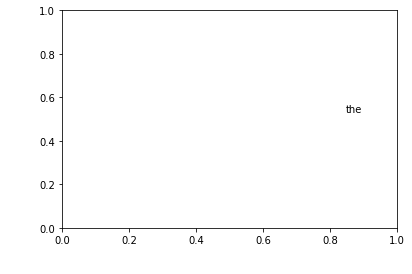

In [6]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors) 

from sklearn import preprocessing

normalizer = preprocessing.Normalizer()
nvectors =  normalizer.fit_transform(vectors, 'l2')

print(nvectors)

import matplotlib.pyplot as plt


fig, ax = plt.subplots()
print(words)
for word in words:
    print(word, vectors[word2int[word]][1])
    ax.annotate(word, (nvectors[word2int[word]][0],nvectors[word2int[word]][1] ))
plt.show()

In [14]:
import gensim

In [16]:
wv = gensim.models.word2vec()

TypeError: 'module' object is not callable